# Ch5. Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
%matplotlib inline

boston = load_boston()

bostonDF = pd.DataFrame(boston.data, columns=boston.feature_names)

bostonDF['PRICE'] = boston.target
print('Boston 데이터 세트 크기:', bostonDF.shape)
bostonDF.head()

Boston 데이터 세트 크기: (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


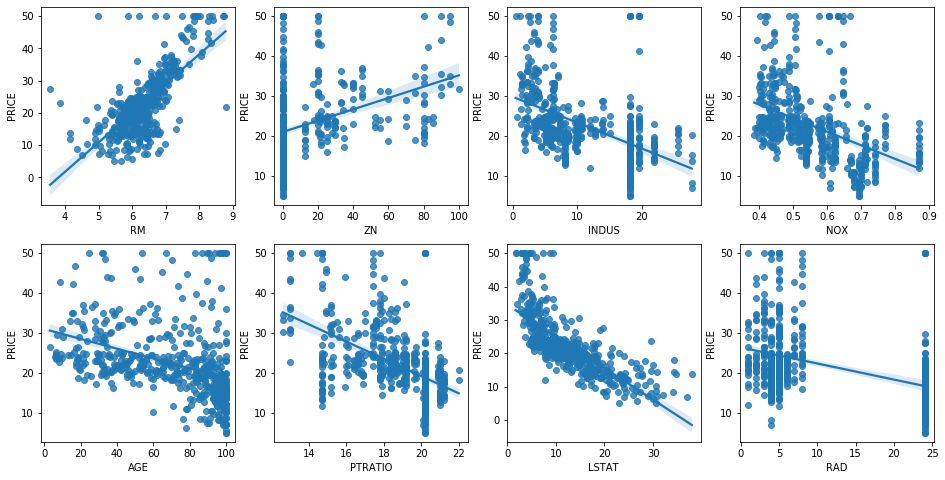

In [2]:
fig, axs = plt.subplots(figsize=(16,8), ncols=4, nrows=2)
lm_features = ['RM', 'ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']
for i, feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    
    sns.regplot(x=feature, y='PRICE', data=bostonDF, ax=axs[row][col])

In [3]:
bostonDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [4]:
bostonDF.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## 단일 변수에 대한 선형 회귀

In [5]:
from sklearn.model_selection import train_test_split

X = bostonDF['RM']
Y = boston.target

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2019)

- 모델 분리 와 객체 생성

In [6]:
from sklearn.linear_model import LinearRegression
sim_lr = LinearRegression()

- 모델 학습

In [7]:
sim_lr.fit(X_train.values.reshape(-1,1), y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
boston.data[:5,:]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9283e+02, 4.0300e+00],
       [3.2370e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        6.9980e+00, 4.5800e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9463e+02, 2.9400e+00],
       [6.9050e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        7.1470e+00, 5.4200e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9690e+02, 5.3300e+00]])

In [9]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

- 결과 예측하기

In [10]:
y_pred = sim_lr.predict(X_test.values.reshape(-1,1))

- 결과 확인하기

In [11]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.1795128921483402

- 계수(weight), 절편(bias)

In [12]:
sim_lr.coef_, sim_lr.intercept_

(array([9.99002801]), -40.094059576934114)

- 도출한 회귀식 PRICE = 9.99 + RM - 40.09

- 산점도 그리기

In [13]:
line_x = np.linspace(np.min(X_test), np.max(X_test), 10)
line_y = sim_lr.predict(line_x.reshape(-1,1))

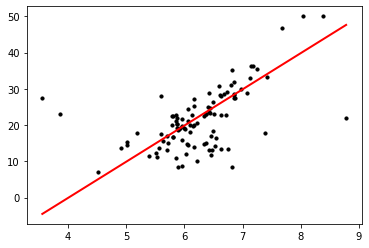

In [14]:
plt.scatter(X_test,y_test, s=10, c='black')
plt.plot(line_x, line_y, c='red', lw=2)
plt.show()

In [15]:
w = sim_lr.coef_[0]
b = sim_lr.intercept_
xs = np.array([4,8])
ys = xs*w + b

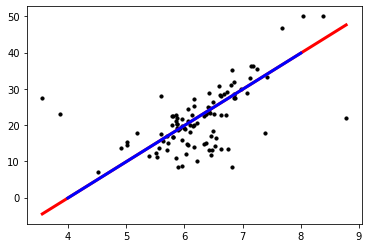

In [16]:
plt.scatter(X_test,y_test, s=10, c='black')
plt.plot(line_x, line_y, c='red', lw=3)
plt.plot(xs, ys, c='blue', lw=3)
plt.show()

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target=bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=156)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0: .3f}, RMSE : {1: .3F}'.format(mse, rmse))
print('Variance score : {0: .3f}'.format(r2_score(y_test, y_preds)))


MSE :  17.297, RMSE :  4.159
Variance score :  0.757


- PRICE vs LSTAT

In [18]:
X = bostonDF['PRICE']
Y = bostonDF['LSTAT']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2019)

In [19]:
sim_lr = LinearRegression()

In [20]:
sim_lr.fit(X_train.values.reshape(-1,1), y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
y_pred = sim_lr.predict(X_test.values.reshape(-1,1))

In [22]:
r2_score(y_test, y_pred)

0.5231032444464312

In [23]:
sim_lr.coef_, sim_lr.intercept_

(array([-0.55768229]), 25.241601501515532)

In [24]:
line_x = np.linspace(np.min(X_test), np.max(X_test), 10)
line_y = sim_lr.predict(line_x.reshape(-1,1))

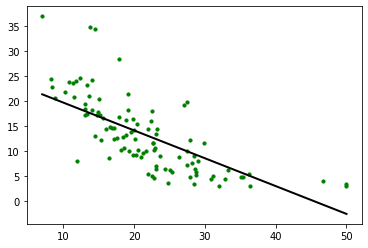

In [25]:
plt.scatter(X_test,y_test, s=10, c='green')
plt.plot(line_x, line_y, c='black', lw=2)
plt.show()

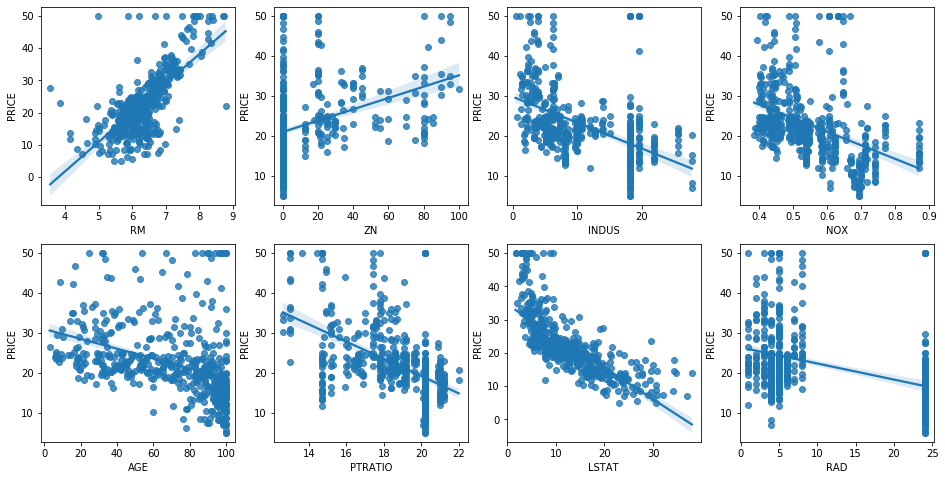

In [26]:
fig, axs = plt.subplots(figsize=(16,8), ncols=4, nrows=2)
X = bostonDF['PRICE']
y_features = ['RM', 'ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']
for i in range(len(y_features)):
    y = bostonDF[y_features[i]]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2019)
    sim_lr = LinearRegression()
    sim_lr.fit(X_train.values.reshape(-1,1), y_train)
    r2_score(y_test, y_pred)
    sim_lr.coef_, sim_lr.intercept_
    line_x = np.linspace(np.min(X_test), np.max(X_test), 10)
    line_y = sim_lr.predict(line_x.reshape(-1,1))
    row = int(i/4)
    col= i%4
    sns.regplot(x=y, y=X, data=bostonDF, ax=axs[row][col])

In [28]:
from sklearn.metrics import mean_squared_error
def single_regression(x_train, x_test, y_train, y_test):
    slr=LinearRegression()
    slr.fit(x_train.values.reshape(-1,1), y_train)
    y_pred = slr.predict(x_test.values.reshape(-1,1))
    rmse = np.round(np.sqrt(mean_squared_error(y_test, y_pred)),2)
    
    return rmse, slr.coef_[0], slr.intercept_

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

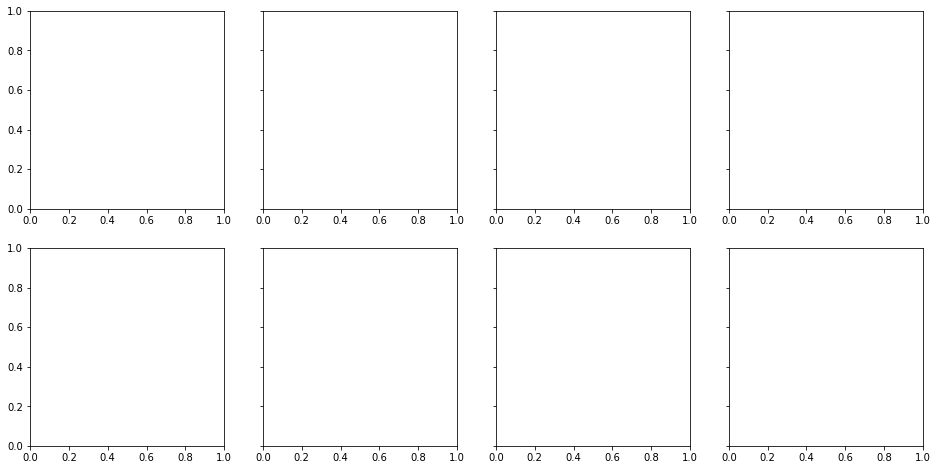

In [29]:
fig, axs = plt.subplots(figsize=(16, 8), ncols=4, nrows=2, sharey=True)
index=0
lm_features = ['RM', 'ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']
for i, feature in enumerate(lm_features):
    X = bostonDF[feature]
    x_train, x_test, y_train, y_test = train_test_split(X, boston.target, test_size=0.2,
                                                       random_state=19)
    rmse, weight, bias = single_regression(x_train, x_test, y_train, y_test)
    
    row = i / 4
    col = i % 4
    ax = axs[row][col]
    ax.scatter(x_test, y_test, s=10, c='black')
    line_x = np.array([np.min(X_test), np.max(X_test)])
    line_y = weight * xline +bias
    ax.plot(xline, yline, c='red', lw=3)
    ax.set_title(feature)
    fig.suptitle('Price 와 각 Feature에 대한 회귀선 및 RMSE')
    plt.show()

### Decision Tree Regressor

In [30]:
from sklearn.tree import DecisionTreeRegressor

dt_regr = DecisionTreeRegressor(max_depth=5)

X = bostonDF['LSTAT']
Y = boston.target

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=19)


In [31]:
dt_regr.fit(X_train.values.reshape(-1,1), y_train)
y_pred = dt_regr.predict(X_test.values.reshape(-1,1))
rmse = np.round(np.sqrt(mean_squared_error(y_test, y_pred)),2)
print('Dtree RMSE:', rmse)

Dtree RMSE: 6.16


### Suppoer Vector Machine Regressor

In [32]:
from sklearn.svm import SVR
svm_regr = SVR()

svm_regr.fit(X_train.values.reshape(-1,1), y_train)
y_pred = svm_regr.predict(X_test.values.reshape(-1,1))
rmse = np.round(np.sqrt(mean_squared_error(y_test, y_pred)),2)
print('SVR RMSE:', rmse)

SVR RMSE: 7.03


In [33]:
sim_lr.fit(X_train.values.reshape(-1,1), y_train)
y_pred = sim_lr.predict(X_test.values.reshape(-1,1))
rmse = np.round(np.sqrt(mean_squared_error(y_test, y_pred)),2)
print('LR RMSE:', rmse)

LR RMSE: 7.09


## 다중 회귀

In [39]:
from sklearn.model_selection import train_test_split
y_target=bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)
X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=156)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)
mse=mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0: .3f}, RMSE: {1: .3F}'.format(mse,rmse))
print('Variance score : {0: .3f}'.format(r2_score(y_test,y_preds)))


MSE :  17.297, RMSE:  4.159
Variance score :  0.757


In [40]:
print('절편 값:',lr.intercept_)

절편 값: 40.995595172164336


In [41]:
print('회귀 계수 값:', np.round(lr.coef_,1))

회귀 계수 값: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [44]:
coeff = pd.Series(data=np.round(lr.coef_,1), index=X_data.columns)
coeff.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
B           0.0
TAX        -0.0
AGE         0.0
INDUS       0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

In [47]:
from sklearn.model_selection import cross_val_score

neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5 folds의 개별 Negative MSE scores:', np.round(neg_mse_scores,2))
print('5 folds의 개별 RMSE scores :', np.round(rmse_scores, 2))
print('5 folds의 평균 RMSE:{0: .3f}'.format(avg_rmse))


5 folds의 개별 Negative MSE scores: [-12.46 -26.05 -33.07 -80.76 -33.31]
5 folds의 개별 RMSE scores : [3.53 5.1  5.75 8.99 5.77]
5 folds의 평균 RMSE: 5.829


## 5.5 다항 회귀

In [49]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2) #degree=2 => (1, x1, x2, x1^2)형태를 만들어 주겠다는것
X = bostonDF['LSTAT']
pf = poly.fit_transform(X.values.reshape(-1,1))


In [50]:
pf.shape

(506, 3)

In [52]:
x_train, x_test, y_train, y_test=train_test_split(X,Y, test_size=0.2, random_state=2019)
pf_train = poly.fit_transform(x_train.values.reshape(-1,1))
pf_test = poly.fit_transform(x_test.values.reshape(-1,1))

In [53]:
lr = LinearRegression()
lr.fit(pf_train,y_train)
y_pred = lr.predict(pf_test)
rmse = np.round(np.sqrt(mean_squared_error(y_test, y_pred)),2)
rmse

5.34

In [55]:
lr.coef_ #상수항 , 1차식의 계수, 2차식의 계수

array([ 0.        , -2.47262189,  0.04716606])

In [56]:
lr.intercept_

44.01462657247066

In [66]:
xs = np.linspace(0, 31,100)
line_x = poly.fit_transform(xs.reshape(-1,1))
line_y = lr.predict(line_x)

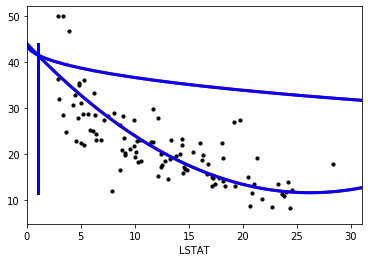

In [69]:
plt.scatter(x_test,y_test, s=10, c='black')
plt.plot(line_x, line_y, c='red', lw=3)
plt.plot(line_x, line_y, c='blue', lw=3)
plt.xlim(0,31)
plt.xlabel('LSTAT')
plt.show()

## 5.6 - 규제 선형 모델

### Ridge Regression - L2규제

In [70]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

ridge = Ridge(alpha = 10)
neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

In [71]:
print('5 folds의 개별 Negative MSE scores:', np.round(neg_mse_scores,3))
print('5 folds의 개별 RMSE scores :', np.round(rmse_scores, 3))
print('5 folds의 평균 RMSE:{0: .3f}'.format(avg_rmse))

5 folds의 개별 Negative MSE scores: [-11.422 -24.294 -28.144 -74.599 -28.517]
5 folds의 개별 RMSE scores : [3.38  4.929 5.305 8.637 5.34 ]
5 folds의 평균 RMSE: 5.518


In [72]:
alphas = [0, 0.1, 1, 10, 100]

for alpha in alphas:
    ridege = Ridge(alpha = alpha)
    
    meg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print('alpha{0} 일 때 folds 의 평균 RMSE : {1: .3f}'.format(alpha, avg_rmse))

alpha0 일 때 folds 의 평균 RMSE :  5.518
alpha0.1 일 때 folds 의 평균 RMSE :  5.518
alpha1 일 때 folds 의 평균 RMSE :  5.518
alpha10 일 때 folds 의 평균 RMSE :  5.518
alpha100 일 때 folds 의 평균 RMSE :  5.518


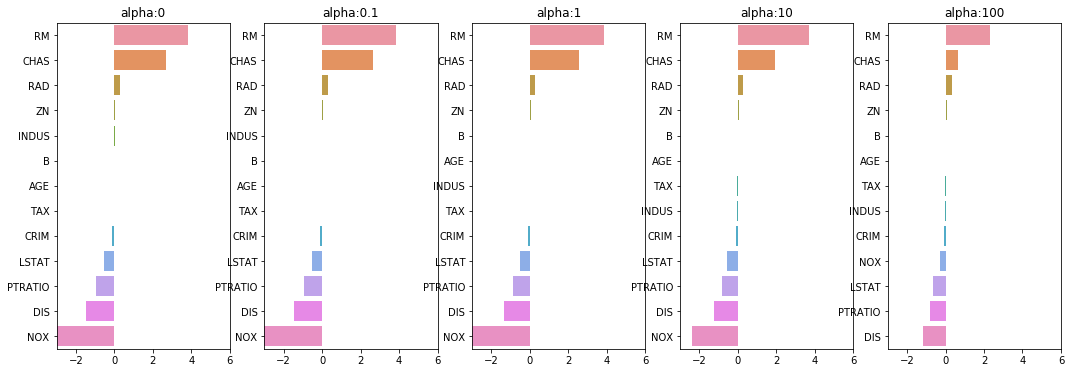

In [75]:
fig, axs = plt.subplots(figsize =(18, 6), nrows=1, ncols=5)

coeff_df = pd.DataFrame()

for pos, alpha in enumerate(alphas):
    ridge = Ridge(alpha = alpha)
    ridge.fit(X_data, y_target)
    
    coeff=pd.Series(data=ridge.coef_, index=X_data.columns)
    colname='alpha:'+str(alpha)
    coeff_df[colname] = coeff
    
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])
    
plt.show()

In [78]:
ridge_alphas = [0, 0.1, 1, 10, 100]
sort_column = 'alpha:'+str(ridge_alphas[0])
coeff_df.sort_values(by=sort_column, ascending = False)

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
RM,3.809865,3.818233,3.854000,3.702272,2.334536
CHAS,2.686734,2.670019,2.552393,1.952021,0.638335
RAD,0.306049,0.303515,0.290142,0.279596,0.315358
ZN,0.046420,0.046572,0.047443,0.049579,0.054496
INDUS,0.020559,0.015999,-0.008805,-0.042962,-0.052826
B,0.009312,0.009368,0.009673,0.010037,0.009393
AGE,0.000692,-0.000269,-0.005415,-0.010707,0.001212
TAX,-0.012335,-0.012421,-0.012912,-0.013993,-0.015856
CRIM,-0.108011,-0.107474,-0.104595,-0.101435,-0.102202
LSTAT,-0.524758,-0.525966,-0.533343,-0.559366,-0.660764


## 5.7 로지스틱 회귀

### w값과 b값에 따른 시그모이드 함수의 변화

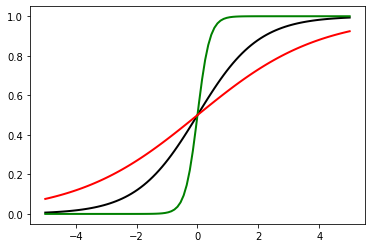

In [89]:
def sigmoid(x, w, b):
    return 1 / (1+np.exp(-(w*x+b)))

xs = np.linspace(-5,5,100)
y1= sigmoid(xs, 1, 0)
y5 = sigmoid(xs, 5, 0)
y05 = sigmoid(xs, 0.5, 0)

plt.plot(xs, y1, lw=2, c='k')
plt.plot(xs, y5, lw=2, c='g')
plt.plot(xs, y05, lw=2, c='r')
plt.show()

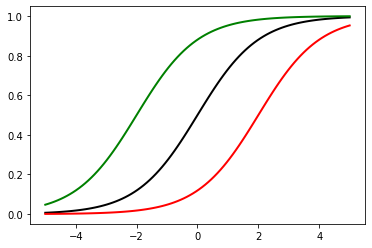

In [90]:
xs = np.linspace(-5,5,100)
y0= sigmoid(xs, 1, 0)
y2 = sigmoid(xs, 1, 2)
y02 = sigmoid(xs, 1, -2)

plt.plot(xs, y0, lw=2, c='k')
plt.plot(xs, y2, lw=2, c='g')
plt.plot(xs, y02, lw=2, c='r')
plt.show()

In [97]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

cancer = load_breast_cancer()

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(cancer.data)

X_train, X_test, y_train, y_test = train_test_split(data_scaled, cancer.target, test_size=0.3, random_state=0)


In [98]:
from sklearn.metrics import accuracy_score, roc_auc_score

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_preds = lr_clf.predict(X_test)

print('accuracy:{0:.3f}'.format(accuracy_score(y_test, lr_preds)))
print('roc_auc:{0:.3f}'.format(roc_auc_score(y_test, lr_preds)))

accuracy:0.977
roc_auc:0.972


In [101]:
from sklearn.model_selection import GridSearchCV
params = {'penalty':['l2','l1'],
         'C':[0.01, 0.1,1,1,5,10]}

grid_clf = GridSearchCV(lr_clf, param_grid=params, scoring='accuracy',cv=3)
grid_clf.fit(data_scaled, cancer.target)
print('최적 하이퍼 파라미터:{0}, 최적 평균 정확도:{1:.3f}'.format(grid_clf.best_params_, grid_clf.best_score_))

최적 하이퍼 파라미터:{'C': 1, 'penalty': 'l2'}, 최적 평균 정확도:0.975


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\ProgramData\Anaconda3\lib\site-packages\

## 5.8 회귀 트리

In [94]:
from sklearn.ensemble import RandomForestRegressor
boston = load_boston()
bostonDF = pd.DataFrame(boston.data, columns = boston.feature_names)

bostonDF['PRICE'] = boston.target
y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)

rf = RandomForestRegressor(random_state=0, n_estimators=1000)
neg_mse_scores = cross_val_score(rf, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5 folds의 개별 Negative MSE scores:', np.round(neg_mse_scores,2))
print('5 folds의 개별 RMSE scores :', np.round(rmse_scores, 2))
print('5 folds의 평균 RMSE:{0: .3f}'.format(avg_rmse))

5 folds의 개별 Negative MSE scores: [ -7.93 -13.06 -20.53 -46.31 -18.8 ]
5 folds의 개별 RMSE scores : [2.82 3.61 4.53 6.8  4.34]
5 folds의 평균 RMSE: 4.420


In [95]:
def get_model_cv_prediction(model, X_data, y_target):
    neg_mse_scores = cross_val_score(model, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
    rmse_scores = np.sqrt(-1 * neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print('#### ', model.__class__.__name__,' ####')
    print('5교차 검증의 평균 RMSE : {0:.3f}'.format(avg_rmse))


In [105]:
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
#from lightgbm import LGBMRegressor

dt_reg = DecisionTreeRegressor(random_state=0, max_depth=4)
rf_reg = RandomForestRegressor(random_state=0, n_estimators=1000)
gb_reg = GradientBoostingRegressor(random_state=0, n_estimators=1000)
xgb_reg = XGBRegressor(n_estimators=1000)
#lgb_reg = LGBRegressor(n_estimators=1000)

models = [dt_reg, rf_reg, gb_reg, xgb_reg]
for model in models:
    get_model_cv_prediction(model, X_data, y_target)

####  DecisionTreeRegressor  ####
5교차 검증의 평균 RMSE : 5.978
####  RandomForestRegressor  ####
5교차 검증의 평균 RMSE : 4.420
####  GradientBoostingRegressor  ####
5교차 검증의 평균 RMSE : 4.269
[13:14:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:14:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:14:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:14:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:14:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
####  XGBRegressor  ####
5교차 검증의 평균 RMSE : 4.089


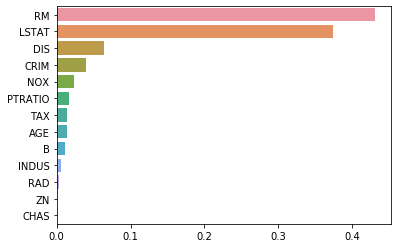

In [106]:
rf_reg = RandomForestRegressor(n_estimators=1000)

rf_reg.fit(X_data, y_target)

feature_series = pd.Series(data=rf_reg.feature_importances_, index=X_data.columns)
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x=feature_series, y=feature_series.index)

(100, 2)


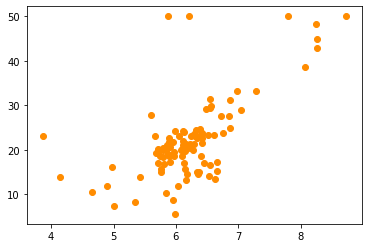

In [107]:
bostonDF_sample = bostonDF[['RM','PRICE']]
bostonDF_sample = bostonDF_sample.sample(n=100, random_state=0)
print(bostonDF_sample.shape)
plt.figure()
plt.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c="darkorange")


In [109]:
lr_reg = LinearRegression()
rf_reg2 = DecisionTreeRegressor(max_depth=2)
rf_reg7 = DecisionTreeRegressor(max_depth=7)

X_test = np.arange(4.5, 8.5, 0.04).reshape(-1,1)

X_feature = bostonDF_sample['RM'].values.reshape(-1,1)
y_target = bostonDF_sample['PRICE'].values.reshape(-1,1)

lr_reg.fit(X_feature, y_target)
rf_reg2.fit(X_feature, y_target)
rf_reg7.fit(X_feature, y_target)

pred_lr = lr_reg.predict(X_test)
pred_rf2 = rf_reg2.predict(X_test)
pred_rf7 = rf_reg7.predict(X_test)

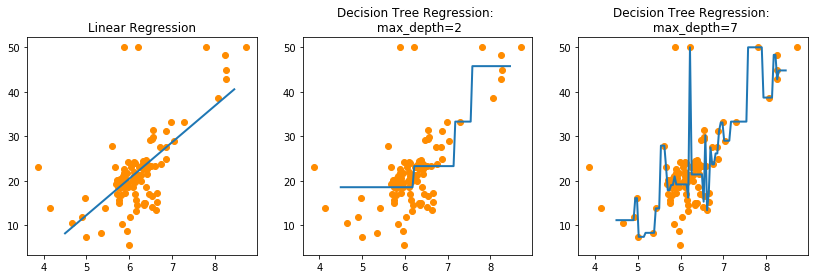

In [113]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(14, 4), ncols=3)

ax1.set_title('Linear Regression')
ax1.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c='darkorange')
ax1.plot(X_test, pred_lr, label='linear', linewidth=2)

ax2.set_title('Decision Tree Regression: \n max_depth=2')
ax2.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c='darkorange')
ax2.plot(X_test, pred_rf2, label='max_depth:3', linewidth=2)

ax3.set_title('Decision Tree Regression: \n max_depth=7')
ax3.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c='darkorange')
ax3.plot(X_test, pred_rf7, label='max_depth:7', linewidth=2)

## 자전거 대여 수요 예측

In [118]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore', category=RuntimeWarning)
bike_df = pd.read_csv('./data/bike_train.csv')
print(bike_df.shape)
bike_df.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [120]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB
